# Plates geometry

## Init symbols for *sympy*

In [2]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [3]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')

init_printing()

In [4]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)

## Cartesian coordinates

In [5]:
x = alpha1
y = alpha2
z = alpha3

r = x*N.i + y*N.j + z*N.k

In [6]:
R1=r.diff(alpha1)
R2=r.diff(alpha2)
R3=r.diff(alpha3)

In [7]:
R1

In [8]:
R2

In [9]:
R3

## Draw

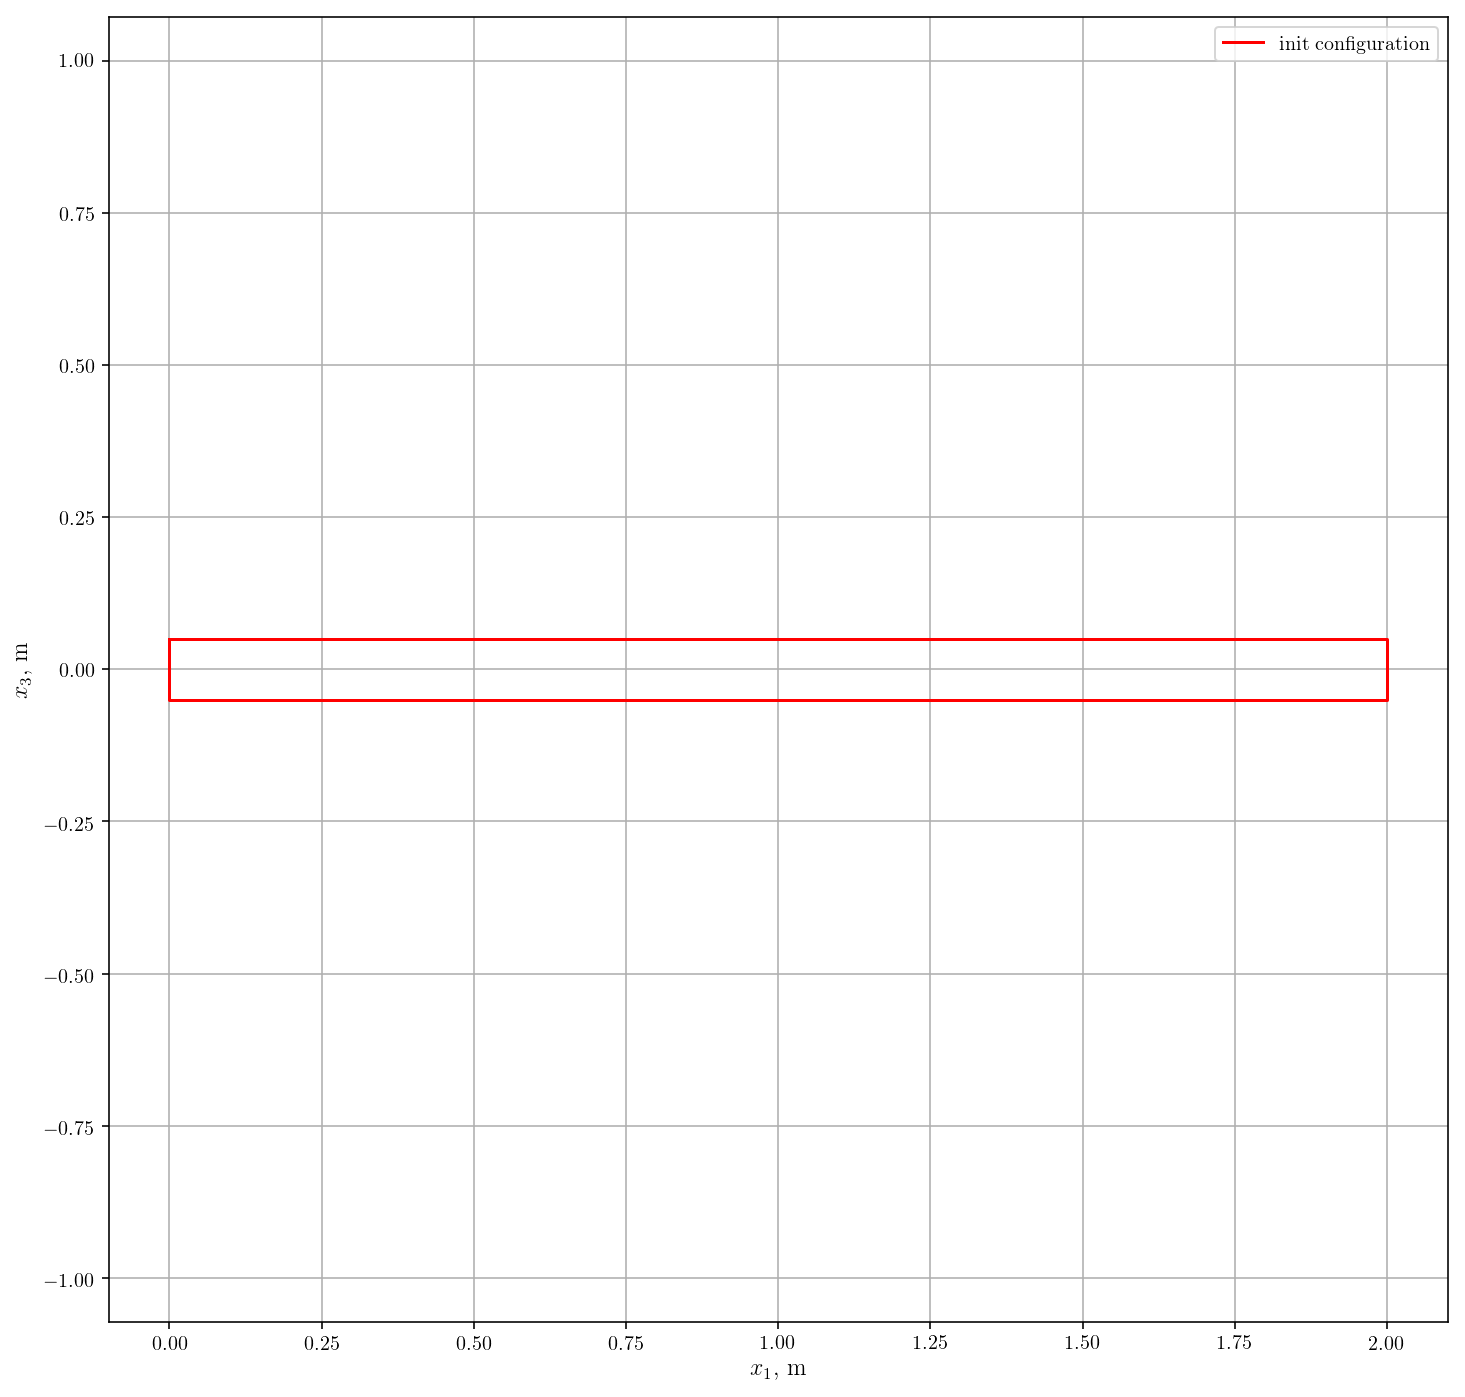

In [10]:
import plot
%aimport plot

alpha1_x = lambdify([alpha1], x, "numpy")
alpha3_z = lambdify([alpha3], z, "numpy")

L_num = 2
h_num = 0.1

x1_start = 0
x1_end = L_num
x3_start = -h_num/2
x3_end = h_num/2

def alpha_to_x(a1, a2, a3):
    x=alpha1_x(a1)
    z=alpha3_z(a3)
    return x, 0, z
    

plot.plot_init_geometry_2(x1_start, x1_end, x3_start, x3_end, alpha_to_x)

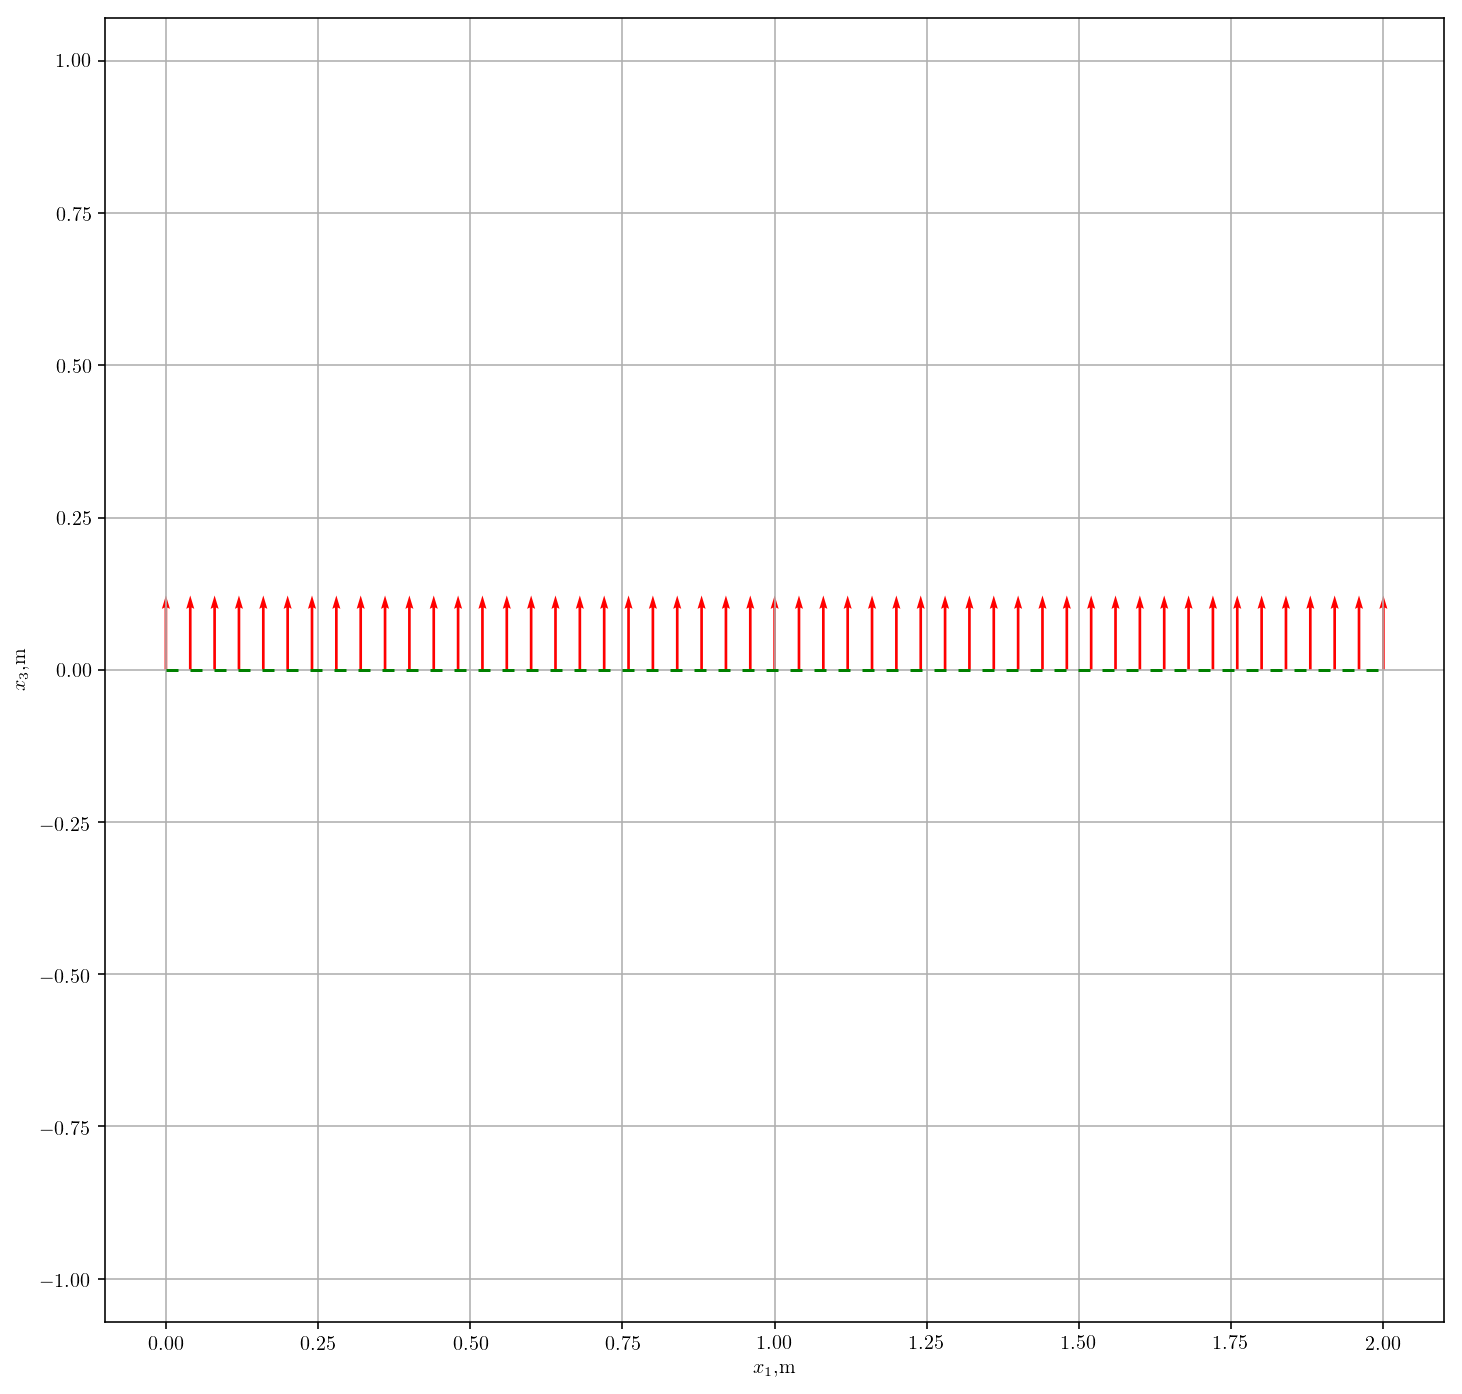

In [11]:
%aimport plot

R3_1=R3.dot(N.i)
R3_3=R3.dot(N.k)

R3_1_x = lambdify([alpha1], R3_1, "numpy")
R3_3_z = lambdify([alpha3], R3_3, "numpy")

def R3_to_x(a1, a2, a3):
    x=R3_1_x(a1)
    z=R3_3_z(a3)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, 0, alpha_to_x, R3_to_x)

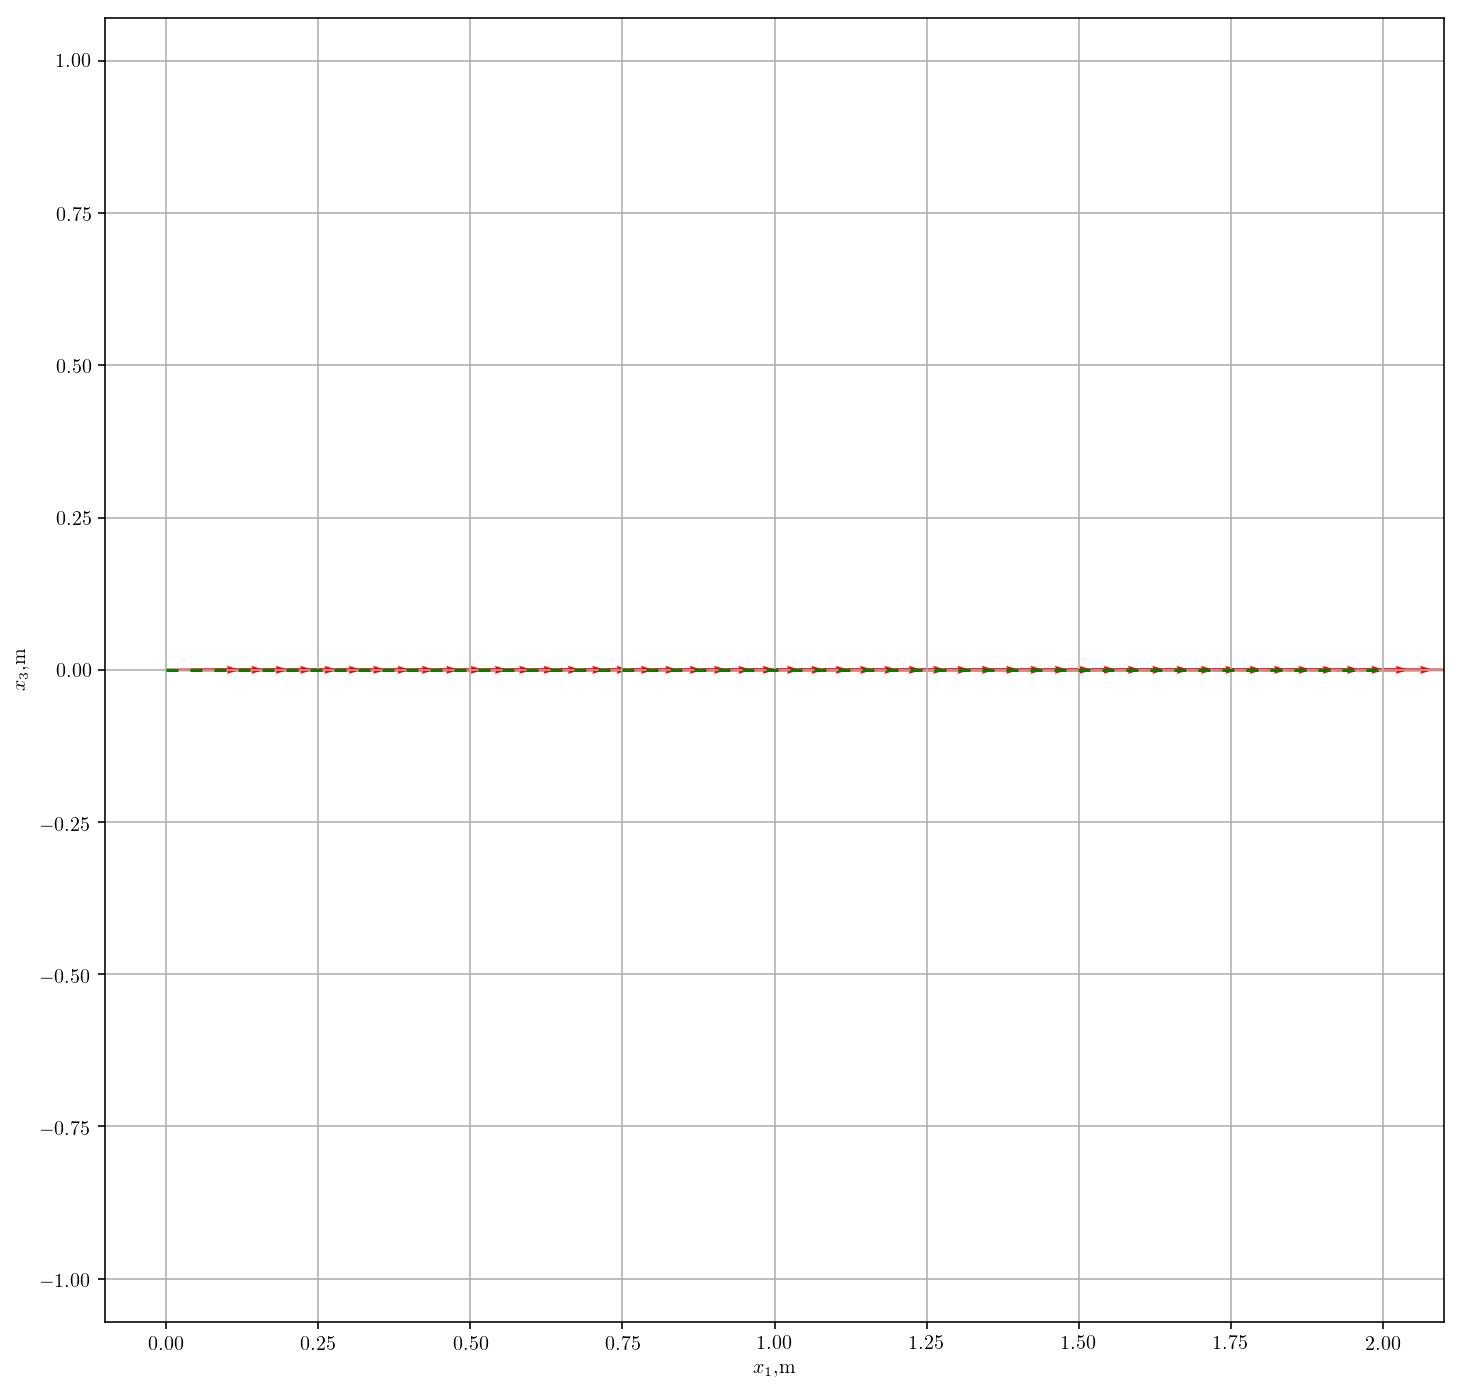

In [12]:
%aimport plot

R1_1=R1.dot(N.i)
R1_3=R1.dot(N.k)

R1_1_x = lambdify([alpha1], R1_1, "numpy")
R1_3_z = lambdify([alpha1], R1_3, "numpy")

def R1_to_x(a1, a2, a3):
    x=R1_1_x(a1)
    z=R1_3_z(a1)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, 0, alpha_to_x, R1_to_x)

### Lame params

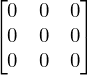

In [13]:
H1=S(1)
H2=S(1)
H3=S(1)

H=[H1, H2, H3]
DIM=3
dH = zeros(DIM,DIM)
for i in range(DIM):
    dH[i,0]=H[i].diff(alpha1)
    dH[i,1]=H[i].diff(alpha2)
    dH[i,2]=H[i].diff(alpha3)

dH
    